In [1]:
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph
%matplotlib notebook

#https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import itertools # Array-making helper tool

In [2]:
#https://github.com/matplotlib/matplotlib/issues/1077/
#https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
#https://python-decompiler.com/article/2012-12/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
#https://github.com/ecell/ecell4/issues/52
#https://github.com/EmilienDupont/augmented-neural-odes/issues/7

In [74]:
def create_box(x0,y0,z0,xlen=0,ylen=0,zlen=0,xn=None,yn=None,zn=None,xspace=1,yspace=1,zspace=1):
    if not xn:
        xn=x0+xlen
    if not yn:
        yn=y0+ylen
    if not zn:
        zn=z0+zlen
    x_ps = list(range(x0,xn,xspace))
    y_ps = list(range(y0,yn,yspace))
    z_ps = list(range(z0,zn,zspace))
    return np.array(list(itertools.product(x_ps,y_ps,z_ps)))

def create_box_line(x0,y0,z0,xlen=0,ylen=0,zlen=0,xn=None,yn=None,zn=None,xspace=1,yspace=1,zspace=1):
    if not xn:
        xn=x0+xlen
    if not yn:
        yn=y0+ylen
    if not zn:
        zn=z0+zlen
    return np.array([
        [x0, y0, z0],
        
        [xn, y0, z0],
        [xn, y0, zn],
        [xn, y0, z0],
        
        [xn, yn, z0],
        [xn, yn, zn],
        [xn, yn, z0],
        
        [x0, yn, z0],
        [x0, yn, zn],
        [x0, yn, z0],
        
        [x0, y0, z0],
        [x0, y0, zn],
        
        [xn, y0, zn],
        [xn, yn, zn],
        [x0, yn, zn],
        [x0, y0, zn]
    ])

In [157]:
x0, y0, z0 = -5, -5, -5
xn, yn, zn = 6, 6, 6
xspace, yspace, zspace = 1, 1, 1
xlim = ((x0 - (xn-x0))*2/3, (xn + (xn-x0))*2/3)
ylim = ((y0 - (yn-y0))*2/3, (yn + (yn-y0))*2/3)
zlim = ((z0 - (zn-z0))*2/3, (zn + (zn-z0))*2/3)


cube_orig = create_box(x0,y0,z0,xn=xn,yn=yn,zn=zn,xspace=xspace,yspace=yspace,zspace=zspace)
cube_orig_x, cube_orig_y, cube_orig_z = zip(*cube_orig)
or_samp_x, or_samp_y, or_samp_z = cube_orig[0]
#https://stackoverflow.com/questions/33287156/specify-color-of-each-point-in-scatter-plot-matplotlib
cseq = np.array([115,169,255,64])/255
c = list(cseq for _ in range(len(cube_orig)))

# I used to do this but it seems like not like what i want
# https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
cube_orig_line = create_box_line(x0,y0,z0,xn=xn-xspace,yn=yn-yspace,zn=zn-zspace,xspace=xspace,yspace=yspace,zspace=zspace)
cube_orig_line_x, cube_orig_line_y, cube_orig_line_z = zip(*cube_orig_line)

<IPython.core.display.Javascript object>


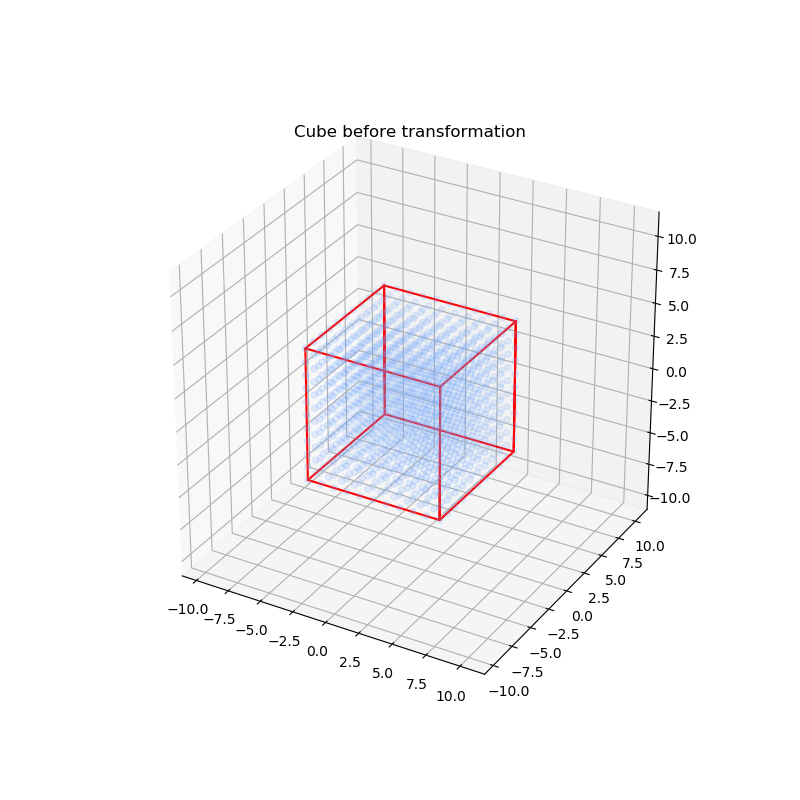

In [154]:
# Creating new visualization figure
f_or = plt.figure(figsize=(8,8))
f_or_ax = f_or.add_subplot(111, projection='3d')

# Plotting the original cube
f_or_ax.scatter(cube_orig_x,cube_orig_y,cube_orig_z,c=c)
f_or_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red')

# Zooming and giving title
f_or_ax.set_xlim(xlim)
f_or_ax.set_ylim(ylim)
f_or_ax.set_zlim(zlim)
f_or_ax.set_title("Cube before transformation")

# Dumping
f_or.savefig("dump/cube_orig.png")
f_or.show()

In [169]:
nhat=np.array([1,-1,1],dtype=np.float)
nhat*=1/np.linalg.norm(nhat) # nhat assumes ||nhat||=1
nhat_x, nhat_y, nhat_z = nhat

# nhat cross product operator matrix [n̂]_×
nhat_cpo = np.array([
    [0      , -nhat_z, nhat_y ],
    [nhat_z , 0      , -nhat_x],
    [-nhat_y, nhat_x , 0      ]
])

theta=np.pi/6

In [197]:
# Axis/angle exponential twist
# R(n̂,θ) = I + sin(θ)[n̂]_× + (1-cos(θ))[n̂]_×²
ax = np.identity(3) + np.sin(theta)*nhat_cpo + (1-np.cos(theta))*(nhat_cpo@nhat_cpo)

#ax_batch = np.array(list(ax for _ in range(len(cube_orig))))
#ax_batch_line = np.array(list(ax for _ in range(len(cube_orig_line))))

cube_axang = np.dot(ax,cube_orig.T).T
cube_axang_x, cube_axang_y, cube_axang_z = zip(*cube_axang)

cube_axang_line = np.dot(ax,cube_orig_line.T).T
cube_axang_line_x, cube_axang_line_y, cube_axang_line_z = zip(*cube_axang_line)

<IPython.core.display.Javascript object>


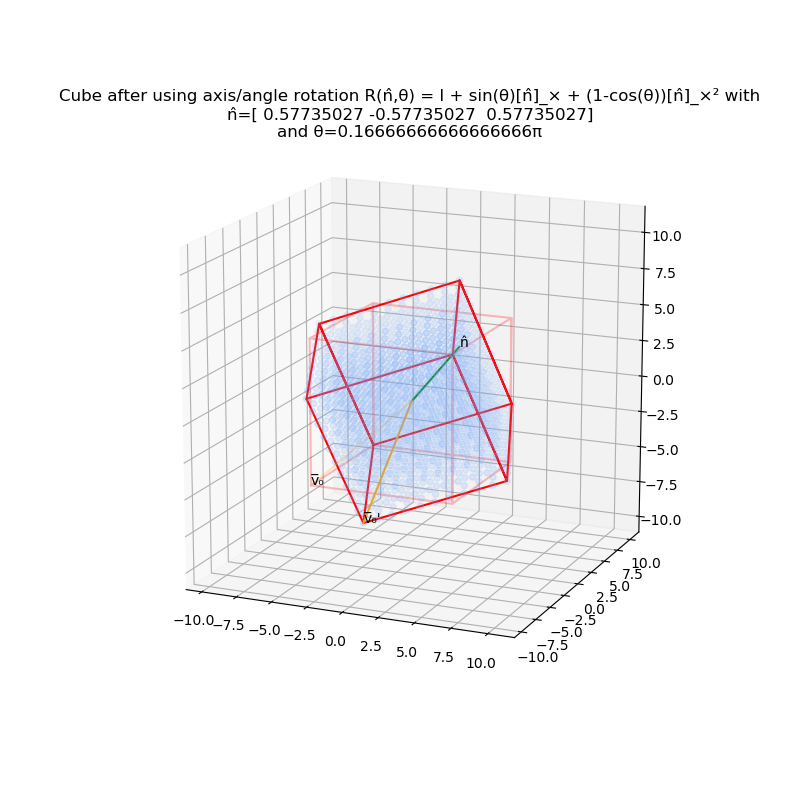

In [201]:
# Creating new visualization figure
f_ax= plt.figure(figsize=(8,8))
f_ax_ax = f_ax.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_ax_ax.scatter(cube_axang_x,cube_axang_y,cube_axang_z,c=c)
f_ax_ax.plot(cube_axang_line_x, cube_axang_line_y, cube_axang_line_z,color='red')
f_ax_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_ax_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_ax_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂")
# fist point vector sample prior to rotation
f_ax_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_ax_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
ax_samp_x, ax_samp_y, ax_samp_z = cube_axang[0]
f_ax_ax.plot([0,ax_samp_x],[0,ax_samp_y],[0,ax_samp_z],color='orange')
f_ax_ax.text(ax_samp_x,ax_samp_y,ax_samp_z,"v̅₀'")

# Zooming and giving title
f_ax_ax.set_xlim(xlim)
f_ax_ax.set_ylim(ylim)
f_ax_ax.set_zlim(zlim)
f_ax_ax.set_title(f"Cube after using axis/angle rotation R(n̂,θ) = I + sin(θ)[n̂]_× + (1-cos(θ))[n̂]_×² with\nn̂={str(nhat)}\nand θ={theta/np.pi}π")

# Dumping
f_ax.savefig("dump/cube_axang.png")
f_ax.show()

In [170]:
nhat_batch = np.array(list(nhat for _ in range(len(cube_orig))))
nhat_batch_line = np.array(list(nhat for _ in range(len(cube_orig_line))))

# cos(θ)*v̅ + sin(θ)*(n̂×v̅)
cube_rodri = np.cos(theta)*cube_orig + np.sin(theta)*(np.cross(nhat_batch,cube_orig))
cube_rodri_x, cube_rodri_y, cube_rodri_z = zip(*cube_rodri)

cube_rodri_line = np.cos(theta)*cube_orig_line + np.sin(theta)*(np.cross(nhat_batch_line,cube_orig_line))
cube_rodri_line_x, cube_rodri_line_y, cube_rodri_line_z = zip(*cube_rodri_line)

<IPython.core.display.Javascript object>


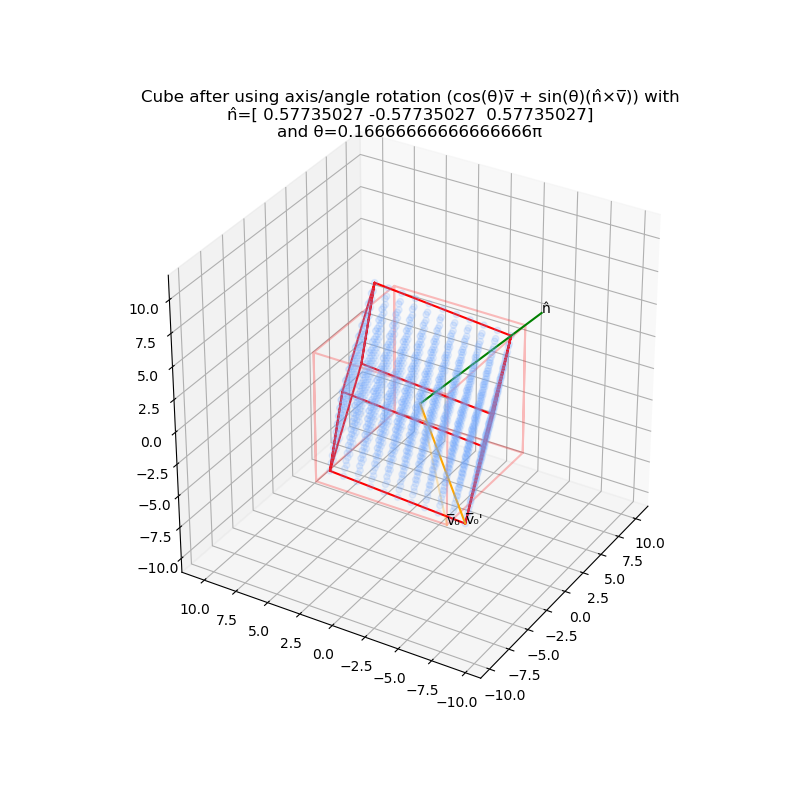

In [203]:
# Creating new visualization figure
f_ro= plt.figure(figsize=(8,8))
f_ro_ax = f_ro.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_ro_ax.scatter(cube_rodri_x,cube_rodri_y,cube_rodri_z,c=c)
f_ro_ax.plot(cube_rodri_line_x, cube_rodri_line_y, cube_rodri_line_z,color='red')
f_ro_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_ro_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_ro_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂")
# fist point vector sample prior to rotation
f_ro_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_ro_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
ro_samp_x, ro_samp_y, ro_samp_z = cube_rodri[0]
f_ro_ax.plot([0,ro_samp_x],[0,ro_samp_y],[0,ro_samp_z],color='orange')
f_ro_ax.text(ro_samp_x,ro_samp_y,ro_samp_z,"v̅₀'")

# Zooming and giving title
f_ro_ax.set_xlim(xlim)
f_ro_ax.set_ylim(ylim)
f_ro_ax.set_zlim(zlim)
f_ro_ax.set_title(f"Cube after using axis/angle rotation (cos(θ)v̅ + sin(θ)(n̂×v̅)) with\nn̂={str(nhat)}\nand θ={theta/np.pi}π")

# Dumping
f_ro.savefig("dump/cube_rodri.png")
f_ro.show()

In [211]:
v = np.sin(theta/2)*nhat
v_x, v_y, v_z = v
v_mat = np.array([
    [0   , -v_z, v_y ],
    [v_z , 0   , -v_z],
    [-v_y, v_x , 0   ]
])

w = np.cos(theta/2)

q_mat = np.identity(3) + (2*w)*v_mat + 2*(v_mat@v_mat)

In [216]:
cube_quarter = np.dot(q_mat,cube_orig.T).T
cube_quarter_x, cube_quarter_y, cube_quarter_z = zip(*cube_quarter)

cube_quarter_line = np.dot(q_mat,cube_orig_line.T).T
cube_quarter_line_x, cube_quarter_line_y, cube_quarter_line_z = zip(*cube_quarter_line)

<IPython.core.display.Javascript object>


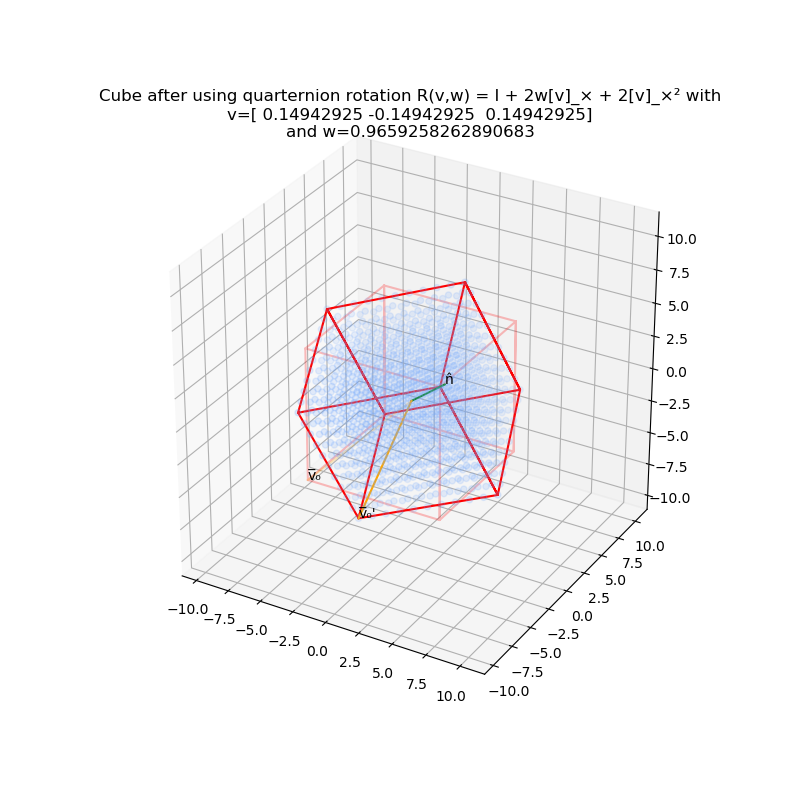

In [218]:
# Creating new visualization figure
f_qu= plt.figure(figsize=(8,8))
f_qu_ax = f_qu.add_subplot(111, projection='3d')

# Plotting the resulting cube
f_qu_ax.scatter(cube_quarter_x,cube_quarter_y,cube_quarter_z,c=c)
f_qu_ax.plot(cube_quarter_line_x, cube_quarter_line_y, cube_quarter_line_z,color='red')
f_qu_ax.plot(cube_orig_line_x, cube_orig_line_y, cube_orig_line_z,color='red',alpha=.25) #Show original

# Showing rotation components
# nhat
f_qu_ax.plot([0,nhat_x*10],[0,nhat_y*10],[0,nhat_z*10],color='green')
f_qu_ax.text(nhat_x*10,nhat_y*10,nhat_z*10,"n̂")
# fist point vector sample prior to rotation
f_qu_ax.plot([0,or_samp_x],[0,or_samp_y],[0,or_samp_z],color='orange',alpha=.25)
f_qu_ax.text(or_samp_x,or_samp_y,or_samp_z,"v̅₀")
# first point vector sample after rotation
qu_samp_x, qu_samp_y, qu_samp_z = cube_quarter[0]
f_qu_ax.plot([0,qu_samp_x],[0,qu_samp_y],[0,qu_samp_z],color='orange')
f_qu_ax.text(qu_samp_x,qu_samp_y,qu_samp_z,"v̅₀'")

# Zooming and giving title
f_qu_ax.set_xlim(xlim)
f_qu_ax.set_ylim(ylim)
f_qu_ax.set_zlim(zlim)
f_qu_ax.set_title(f"Cube after using quarternion rotation R(v,w) = I + 2w[v]_× + 2[v]_×² with\nv={str(v)}\nand w={w}")

# Dumping
f_qu.savefig("dump/cube_quarter.png")
f_qu.show()